In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv(r'F:\Kaggle Data Sets\Number of Upvotes prediction\train.csv')

In [3]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
train.shape

(330045, 7)

In [5]:
train.dtypes

ID              int64
Tag            object
Reputation    float64
Answers       float64
Username        int64
Views         float64
Upvotes       float64
dtype: object

In [6]:
train.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  object 
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [8]:
train.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [9]:
train.nunique()

ID            330045
Tag               10
Reputation     16527
Answers           63
Username      141802
Views          82137
Upvotes         7239
dtype: int64

In [10]:
train['Tag'].value_counts()

c    72458
j    72232
p    43407
i    32400
a    31695
s    23323
h    20564
o    14546
r    12442
x     6978
Name: Tag, dtype: int64

In [11]:
temp=train.sample(frac=0.4,random_state=12)

In [12]:
temp.shape

(132018, 7)

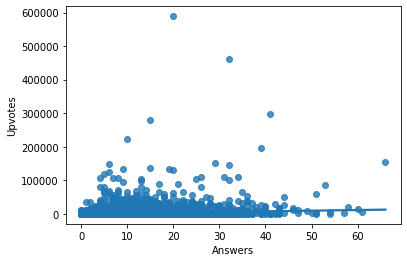

In [13]:
sns.regplot(x='Answers',y='Upvotes',data=temp)

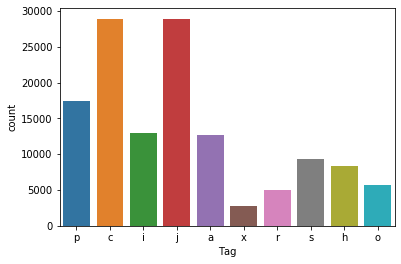

In [14]:
sns.countplot(temp['Tag'])

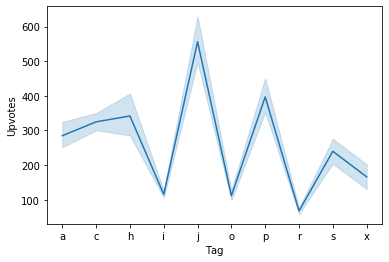

In [16]:
sns.lineplot(x='Tag',y='Upvotes',data=temp)

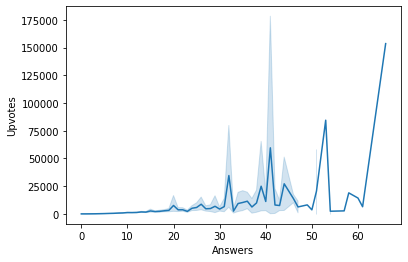

In [17]:
sns.lineplot(x='Answers',y='Upvotes',data=temp)

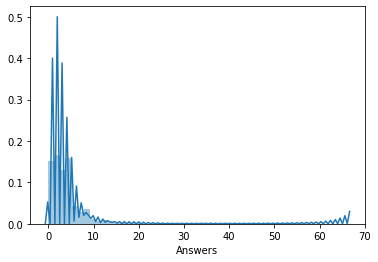

In [18]:
sns.distplot(temp['Answers'])

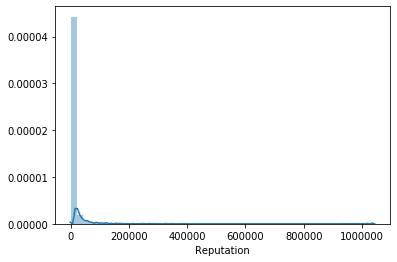

In [19]:
sns.distplot(temp['Reputation'])

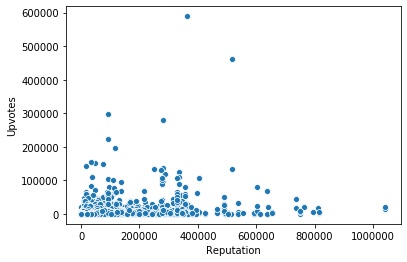

In [20]:
sns.scatterplot(x='Reputation',y='Upvotes',data=temp)

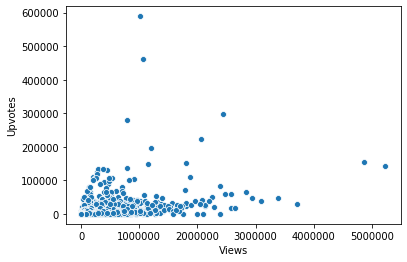

In [21]:
sns.scatterplot(x='Views',y='Upvotes',data=temp)

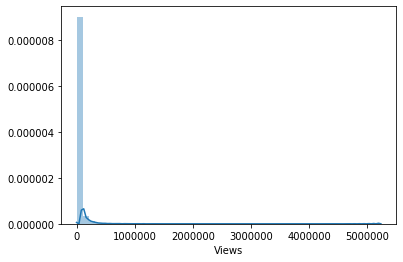

In [22]:
sns.distplot(temp['Views'])

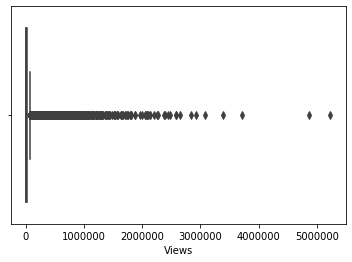

In [23]:
sns.boxplot(temp['Views'])

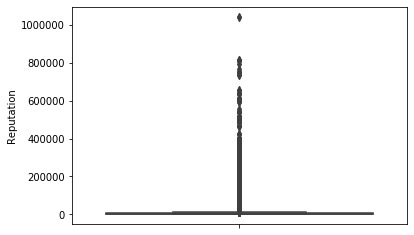

In [24]:
sns.boxplot(y=temp['Reputation'])

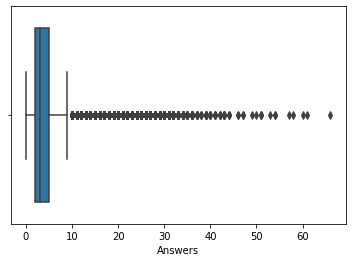

In [25]:
sns.boxplot(temp['Answers'])

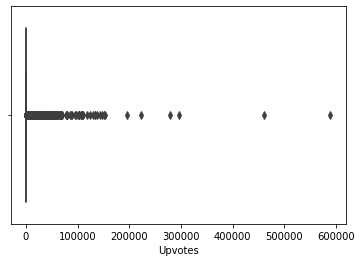

In [27]:
sns.boxplot(temp['Upvotes'])

In [28]:
train_o=train.drop(['ID','Tag'],axis=1)

In [29]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train_o))
print(z)

[[0.14157253 0.53573597 1.5072655  0.26915833 0.08225766]
 [0.67523751 2.25794312 1.21226978 0.32308687 0.23312725]
 [0.23705919 0.02299985 0.51337753 0.26653963 0.07724713]
 ...
 [0.05894553 0.53573597 0.20843454 0.33588566 0.08977345]
 [0.2839526  0.53573597 0.0243399  0.34015957 0.09311381]
 [0.21329838 0.02299985 1.48834852 0.33463807 0.08364947]]


In [30]:
threshold = 3
print(np.where(z > 3))

(array([    46,     95,     95, ..., 329963, 329963, 330034], dtype=int64), array([1, 1, 3, ..., 3, 4, 1], dtype=int64))


In [40]:
train_o=train[(z < 3).all(axis=1)]

In [41]:
train_o.shape

(316165, 7)

In [42]:
train.shape

(330045, 7)

In [43]:
train_o.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [45]:
train_o.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,316165.000000,316165.000000,316165.000000,316165.000000,316165.000000,316165.00000
mean,235434.220094,5076.940012,3.540256,81600.014701,21706.103155,148.38800
std,136053.034324,10465.184367,2.555177,49258.925652,35074.745994,501.68313
min,1.000000,0.000000,0.000000,0.000000,15.000000,0.00000
25%,117492.000000,244.000000,2.000000,39876.000000,2490.000000,8.00000
50%,235261.000000,1137.000000,3.000000,79206.000000,8483.000000,25.00000
75%,353364.000000,4602.000000,5.000000,122805.000000,24474.000000,90.00000
max,471493.000000,88910.000000,14.000000,175738.000000,272494.000000,11082.00000


In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_o['Tag']=le.fit_transform(train_o['Tag'])

F:\New folder (2)\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
train_o.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,0,3942.0,2.0,155623,7855.0,42.0
1,327662,0,26046.0,12.0,21781,55801.0,1175.0
2,468453,1,1358.0,4.0,56177,8067.0,60.0
3,96996,0,264.0,3.0,168793,27064.0,9.0
4,131465,1,4271.0,4.0,112223,13986.0,83.0


In [48]:
train_o.dtypes

ID              int64
Tag             int32
Reputation    float64
Answers       float64
Username        int64
Views         float64
Upvotes       float64
dtype: object

In [49]:
train_o.tail(10)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
330035,407477,2,2399.0,12.0,99538,49396.0,126.0
330036,344415,4,202.0,8.0,100575,85644.0,20.0
330037,194443,6,2674.0,2.0,81963,52493.0,93.0
330038,212913,6,241.0,4.0,20469,10486.0,20.0
330039,65616,8,84007.0,5.0,78311,5335.0,742.0
330040,339800,1,36.0,2.0,84919,1063.0,0.0
330041,253800,1,1649.0,2.0,76730,23319.0,73.0
330042,210756,1,6178.0,2.0,91701,2453.0,15.0
330043,56089,4,89.0,2.0,80245,2107.0,3.0
330044,300553,4,2001.0,4.0,154692,2554.0,37.0


In [50]:
X=train_o.drop(['ID','Upvotes'],axis=1)
y=train_o['Upvotes']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

## 1. Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.421301489723207

## 2. RandomForestRegressor

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.8512768987183496

## 3. Ridge Regression

In [53]:
from sklearn.linear_model import Ridge
ridgeR=Ridge(alpha=1)
ridgeR.fit(X_train,y_train)
ridgeR.score(X_test,y_test)

0.4213014898464691

## 4.Lasso Regression

In [54]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1)
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

0.42132011497150434

## 5. ElasticNet

In [55]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=1)
en.fit(X_train,y_train)
en.score(X_test,y_test)

0.4213223645217232

### Hence, Random Forest Regressor works much better.

In [56]:
X_train=X
y_train=y

In [57]:
test=pd.read_csv(r'F:\Kaggle Data Sets\Number of Upvotes prediction\test.csv')
sample=pd.read_csv(r'F:\Kaggle Data Sets\Number of Upvotes prediction\sample_submission.csv')

In [58]:
test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [59]:
test.dtypes

ID              int64
Tag            object
Reputation    float64
Answers       float64
Username        int64
Views         float64
dtype: object

In [60]:
test.isna().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64

In [61]:
test.shape

(141448, 6)

In [62]:
test.nunique()

ID            141448
Tag               10
Reputation     14098
Answers           58
Username       79351
Views          52807
dtype: int64

In [63]:
sample.head()

,ID,Upvotes
0,7,500
1,9,500
2,12,500
3,13,500
4,16,500


In [64]:
test['Tag']=le.fit_transform(test['Tag'])

In [66]:
test.dtypes

ID              int64
Tag             int32
Reputation    float64
Answers       float64
Username        int64
Views         float64
dtype: object

In [67]:
X_test=test.drop('ID',axis=1)

In [68]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [69]:
y_pred=rfr.predict(X_test)

In [70]:
y_pred[:5]

array([248.04,  76.4 ,  31.6 ,  15.93, 366.36])

In [71]:
y_pred=np.ceil(y_pred)

In [72]:
y_pred

array([249.,  77.,  32., ...,  62.,  12.,  22.])

In [74]:
output=pd.DataFrame({'ID':test['ID'],'Upvotes':y_pred})

In [75]:
output.head()

,ID,Upvotes
0,366953,249.0
1,71864,77.0
2,141692,32.0
3,316833,16.0
4,440445,367.0


In [78]:
output=output.sort_values(by='ID')

In [79]:
output.head()

,ID,Upvotes
118045,7,904.0
74256,9,22.0
132030,12,46.0
47484,13,319.0
20847,16,27.0


In [81]:
sample.head()

,ID,Upvotes
0,7,500
1,9,500
2,12,500
3,13,500
4,16,500


In [82]:
output.to_csv('output.csv',index=False)